# Task
- For this assignment, we will continue revisiting our first project to predict supermarket sales. We will be applying everything we've learned thus far to explain how our models made their predictions.

In [1]:
## Our standard import
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer


## Models & evaluation metrics
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import joblib

# ## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
plt.style.use(('ggplot','tableau-colorblind10'))

# Load Our Saved Joblib File

In [2]:
loaded_joblib = joblib.load('random_forest_l01.joblib')
loaded_joblib.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'RandomForest'])

In [3]:
X_train_df = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test_df = loaded_joblib['X_test']
y_test = loaded_joblib['y_test']
preprocessor = loaded_joblib['preprocessor']
reg = loaded_joblib['RandomForest']

# Explain our tree-based model with shap:
- Create an X_shap and y_shap variable from our training data (use shap.sample as needed).
- Create a model explainer,
- Calculate the shap values for our model.

In [4]:
# Import shap and initialize javascript:
import shap
shap.initjs()

In [5]:
len(X_train_df)

6392

In [6]:
X_shap = shap.sample(X_train_df,nsamples = 200,random_state=SEED)
y_shap = y_train.loc[X_shap.index]
X_shap.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
4469         7.72         0.074669   76.3986                     1987.0   
4438         5.11         0.034868  163.8210                     2004.0   
366          8.05         0.078386  256.4646                     2004.0   
2219         8.76         0.050131  128.3336                     1999.0   
6080         6.59         0.176748   82.7908                     1998.0   

      Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
4469                       0.0                       1.0   
4438                       1.0                       0.0   
366                        0.0                       1.0   
2219                       1.0                       0.0   
6080                       1.0                       0.0   

      Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
4469                     0.0               1.0                  0.0   
4438                     0.0               0.0                  0.0   
366                      0.0               0.0                  0.0   
2219                     0.0               0.0                  0.0   
6080                     0.0               0.0                  0.0   

      Item_Type_Canned  ...  Item_Type_Soft Drinks  Item_Type_Starchy Foods  \
4469               0.0  ...                    0.0                      0.0   
4438               0.0  ...                    0.0                      0.0   
366                0.0  ...                    0.0                      0.0   
2219               0.0  ...                    0.0                      0.0   
6080               0.0  ...                    0.0                      0.0   

      Outlet_Size_High  Outlet_Size_MISSING  Outlet_Size_Medium  \
4469               1.0                  0.0                 0.0   
4438               0.0                  0.0                 0.0   
366                0.0                  0.0                 0.0   
2219               0.0                  0.0                 1.0   
6080               0.0                  1.0                 0.0   

      Outlet_Size_Small  Outlet_Type_Grocery Store  \
4469                0.0                        0.0   
4438                1.0                        0.0   
366                 1.0                        0.0   
2219                0.0                        0.0   
6080                0.0                        1.0   

      Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
4469                            1.0                            0.0   
4438                            1.0                            0.0   
366                             1.0                            0.0   
2219                            1.0                            0.0   
6080                            0.0                            0.0   

      Outlet_Type_Supermarket Type3  
4469                            0.0  
4438                            0.0  
366                             0.0  
2219                            0.0  
6080                            0.0  

[5 rows x 30 columns]

In [7]:
X_shap = X_shap.reset_index(drop=True)
y_shap = y_shap.reset_index(drop=True)
X_shap

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0       7.720000         0.074669   76.3986                     1987.0   
1       5.110000         0.034868  163.8210                     2004.0   
2       8.050000         0.078386  256.4646                     2004.0   
3       8.760000         0.050131  128.3336                     1999.0   
4       6.590000         0.176748   82.7908                     1998.0   
..           ...              ...       ...                        ...   
195     7.810000         0.067837  246.1486                     2007.0   
196    12.822634         0.036214   92.5488                     1985.0   
197    13.350000         0.140241  150.2392                     2007.0   
198    12.822634         0.014019  178.1344                     1985.0   
199     9.695000         0.128806  224.0404                     2009.0   

     Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0                         0.0                       1.0   
1                         1.0                       0.0   
2                         0.0                       1.0   
3                         1.0                       0.0   
4                         1.0                       0.0   
..                        ...                       ...   
195                       1.0                       0.0   
196                       1.0                       0.0   
197                       1.0                       0.0   
198                       0.0                       1.0   
199                       0.0                       1.0   

     Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
0                       0.0               1.0                  0.0   
1                       0.0               0.0                  0.0   
2                       0.0               0.0                  0.0   
3                       0.0               0.0                  0.0   
4                       0.0               0.0                  0.0   
..                      ...               ...                  ...   
195                     0.0               0.0                  0.0   
196                     0.0               0.0                  0.0   
197                     0.0               0.0                  0.0   
198                     0.0               0.0                  0.0   
199                     1.0               0.0                  0.0   

     Item_Type_Canned  ...  Item_Type_Soft Drinks  Item_Type_Starchy Foods  \
0                 0.0  ...                    0.0                      0.0   
1                 0.0  ...                    0.0                      0.0   
2                 0.0  ...                    0.0                      0.0   
3                 0.0  ...                    0.0                      0.0   
4                 0.0  ...                    0.0                      0.0   
..                ...  ...                    ...                      ...   
195               0.0  ...                    1.0                      0.0   
196               0.0  ...                    0.0                      0.0   
197               0.0  ...                    0.0                      0.0   
198               0.0  ...                    0.0                      0.0   
199               0.0  ...                    0.0                      0.0   

     Outlet_Size_High  Outlet_Size_MISSING  Outlet_Size_Medium  \
0                 1.0                  0.0                 0.0   
1                 0.0                  0.0                 0.0   
2                 0.0                  0.0                 0.0   
3                 0.0                  0.0                 1.0   
4                 0.0                  1.0                 0.0   
..                ...                  ...                 ...   
195               0.0                  1.0                 0.0   
196               0.0                  0.0                 1.0   
197               0.0              

In [8]:
# Instantiate a Model Explainer with the model
explainer = shap.Explainer(reg)
explainer

In [9]:
X_shap.shape

(200, 30)

In [10]:
## Get shap values from the explainer
shap_values = explainer(X_shap,y_shap, check_additivity=False)

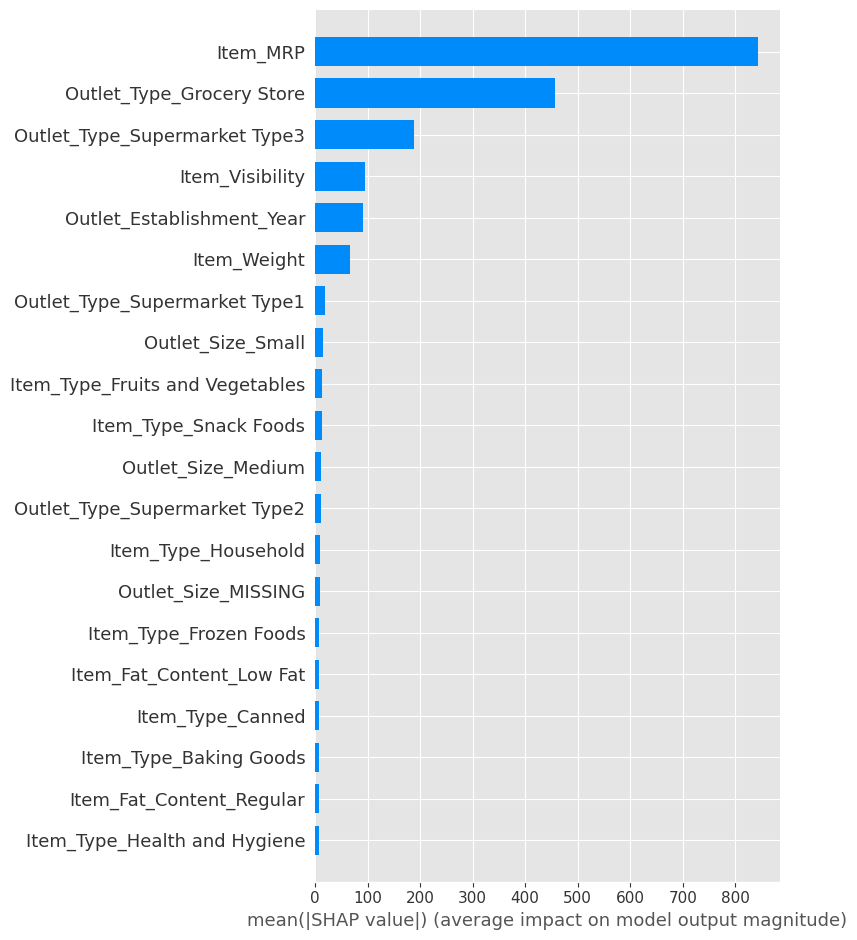

In [11]:
## create a summary plot (bar version)
# Saving our bar summary plot figure as a .png file
fig, ax = plt.subplots()
shap.summary_plot(shap_values, features = X_shap, plot_type='bar')

fig.savefig('Data/summary_plot_rf.png', bbox_inches="tight")

## display our saved feature importance image


<img src="Data/importances.png">

## comparing the most important features according to SHAP vs. our original feature importances.
Are they the same features in both? If not, what's different?
  - These are almost idetical with the exception of the visibility abd outlet type(Supermarket type 3) swapped.

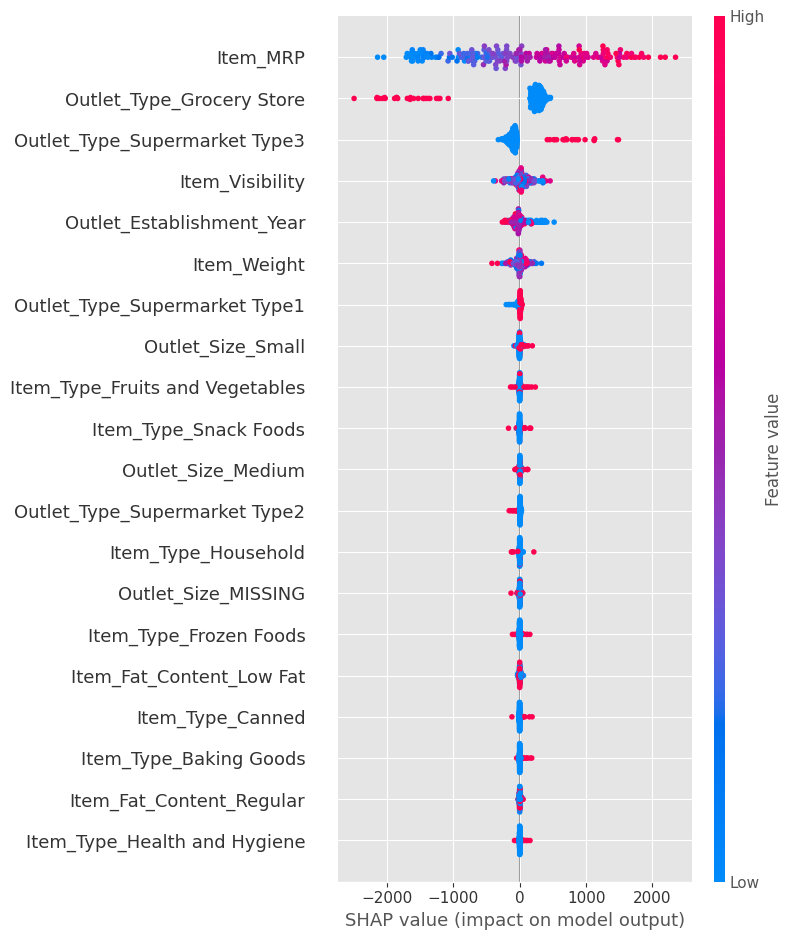

In [12]:
## create a summary plot (dot/default version)
fig, ax = plt.subplots()
shap.summary_plot(shap_values, features = X_shap)

fig.savefig('Data/summary_plot_dot.png')

## Interpret the top 3 most important features and how they influence our model's predictions.
1. Item MRP:
 - The more the item cost the more likely the amount in total sales will increase
2. Outlet type "Grocery Store"
 - Although this "type of outlet is lower on the feature value it seems to affect to amount of sales positively.
3. Outlet Type "Supermarket Type 3":
 - The higher this value is(more of this type of building) the more it increase the amount of sales.


# Local Explanation

Using Top Features to Select Examples
- Item_MRP
- Outlet_Type_Grocery Store
- Item_Weight
- Outlet_Establishment_Year
- Item_Visibility

In [13]:
## Making a vers of shap vars with 0-based integer index 
# so what it matches the index for the shap_vallues
X_shap_local = X_shap.reset_index(drop=True)
y_shap_local = y_shap.reset_index(drop=True)

X_shap_local.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0         7.72         0.074669   76.3986                     1987.0   
1         5.11         0.034868  163.8210                     2004.0   
2         8.05         0.078386  256.4646                     2004.0   
3         8.76         0.050131  128.3336                     1999.0   
4         6.59         0.176748   82.7908                     1998.0   

   Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  Item_Type_Baking Goods  \
0                       0.0                       1.0                     0.0   
1                       1.0                       0.0                     0.0   
2                       0.0                       1.0                     0.0   
3                       1.0                       0.0                     0.0   
4                       1.0                       0.0                     0.0   

   Item_Type_Breads  Item_Type_Breakfast  Item_Type_Canned  ...  \
0               1.0                  0.0               0.0  ...   
1               0.0                  0.0               0.0  ...   
2               0.0                  0.0               0.0  ...   
3               0.0                  0.0               0.0  ...   
4               0.0                  0.0               0.0  ...   

   Item_Type_Soft Drinks  Item_Type_Starchy Foods  Outlet_Size_High  \
0                    0.0                      0.0               1.0   
1                    0.0                      0.0               0.0   
2                    0.0                      0.0               0.0   
3                    0.0                      0.0               0.0   
4                    0.0                      0.0               0.0   

   Outlet_Size_MISSING  Outlet_Size_Medium  Outlet_Size_Small  \
0                  0.0                 0.0                0.0   
1                  0.0                 0.0                1.0   
2                  0.0                 0.0                1.0   
3                  0.0                 1.0                0.0   
4                  1.0                 0.0                0.0   

   Outlet_Type_Grocery Store  Outlet_Type_Supermarket Type1  \
0                        0.0                            1.0   
1                        0.0                            1.0   
2                        0.0                            1.0   
3                        0.0                            1.0   
4                        1.0                            0.0   

   Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  
0                            0.0                            0.0  
1                            0.0                            0.0  
2                            0.0                            0.0  
3                            0.0                            0.0  
4                            0.0                            0.0  

[5 rows x 30 columns]

<AxesSubplot:xlabel='Item_MRP', ylabel='Count'>

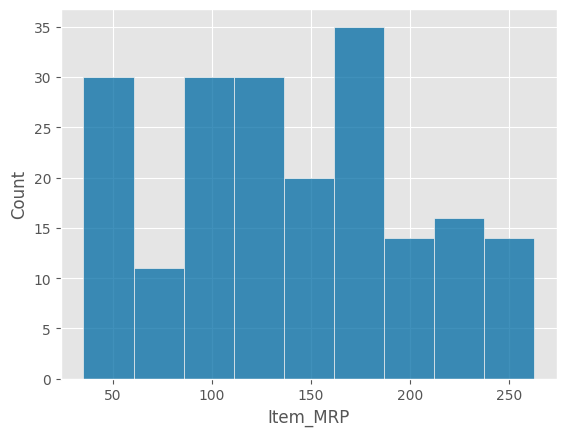

In [14]:
sns.histplot(X_shap['Item_MRP'])

In [15]:
filt_Item_MRP = X_shap['Item_MRP'] < 200
filt_Item_MRP.value_counts()

True     167
False     33
Name: Item_MRP, dtype: int64

<AxesSubplot:xlabel='Outlet_Type_Grocery Store', ylabel='Count'>

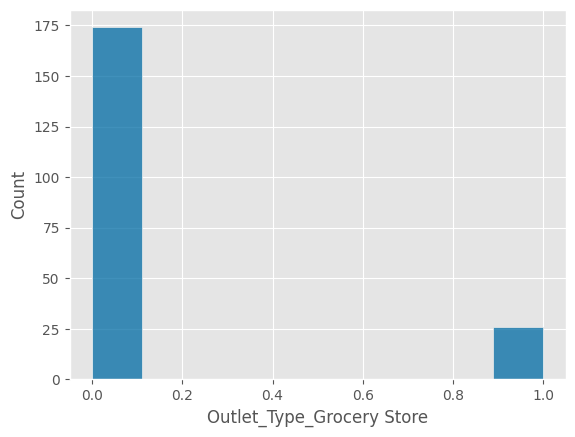

In [16]:
sns.histplot(X_shap['Outlet_Type_Grocery Store'])

In [17]:
filt_grocery = X_shap['Outlet_Type_Grocery Store'] == False
filt_grocery.value_counts()

True     174
False     26
Name: Outlet_Type_Grocery Store, dtype: int64

<AxesSubplot:xlabel='Item_Weight', ylabel='Count'>

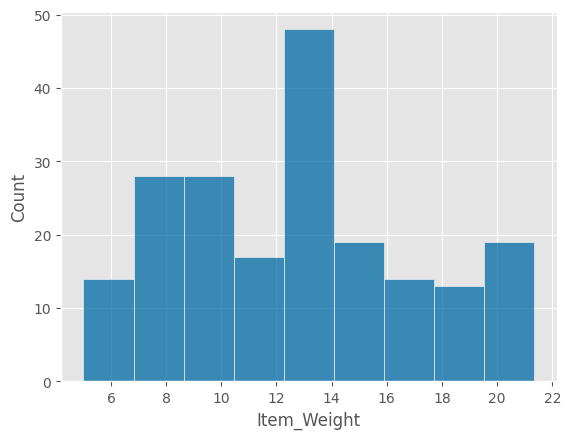

In [18]:
sns.histplot(X_shap['Item_Weight'])

In [19]:
filt_weight = X_shap['Item_Weight'] < 10
filt_weight.value_counts()

False    137
True      63
Name: Item_Weight, dtype: int64

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Count'>

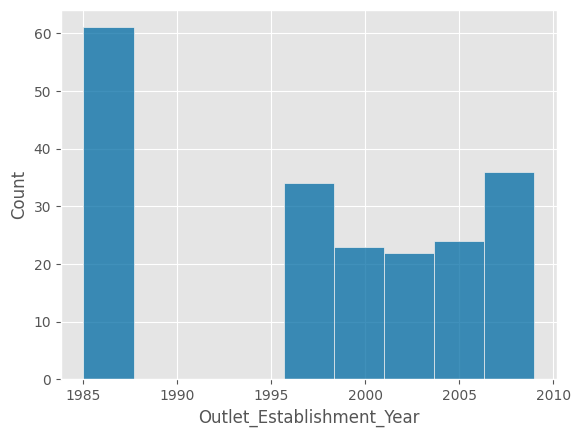

In [20]:
sns.histplot(X_shap['Outlet_Establishment_Year'])

In [21]:
filt_estyear = X_shap['Outlet_Establishment_Year'] > 2008
filt_estyear.value_counts()

False    181
True      19
Name: Outlet_Establishment_Year, dtype: int64

<AxesSubplot:xlabel='Item_Visibility', ylabel='Count'>

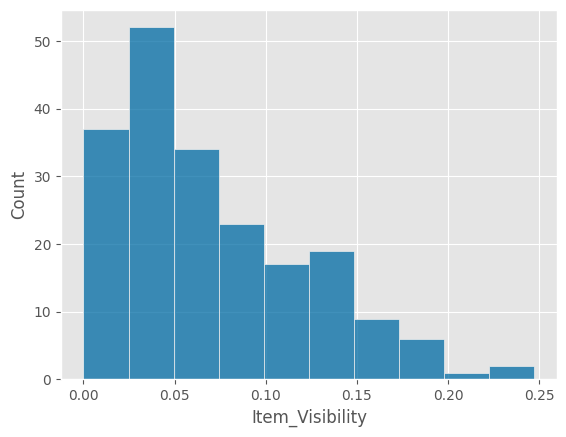

In [22]:
sns.histplot(X_shap['Item_Visibility'])

In [23]:
filt_visibility = X_shap['Item_Visibility'] < 0.10
filt_visibility.value_counts()

True     148
False     52
Name: Item_Visibility, dtype: int64

In [24]:
# Group 1 - Newer Building
X_shap[ filt_Item_MRP & filt_grocery & filt_weight & filt_estyear & filt_visibility]

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
6          9.800         0.026950  128.4020                     2009.0   
24         8.930         0.028533  151.4340                     2009.0   
64         9.695         0.029693  159.7920                     2009.0   
69         6.380         0.032028  178.3344                     2009.0   
82         8.185         0.046673   48.4692                     2009.0   
165        5.305         0.047220  181.9608                     2009.0   

     Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
6                         1.0                       0.0   
24                        1.0                       0.0   
64                        1.0                       0.0   
69                        1.0                       0.0   
82                        1.0                       0.0   
165                       0.0                       1.0   

     Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
6                       0.0               0.0                  0.0   
24                      0.0               0.0                  0.0   
64                      0.0               0.0                  0.0   
69                      0.0               0.0                  0.0   
82                      0.0               0.0                  0.0   
165                     0.0               0.0                  0.0   

     Item_Type_Canned  ...  Item_Type_Soft Drinks  Item_Type_Starchy Foods  \
6                 0.0  ...                    0.0                      0.0   
24                0.0  ...                    0.0                      0.0   
64                0.0  ...                    0.0                      0.0   
69                0.0  ...                    0.0                      0.0   
82                0.0  ...                    0.0                      0.0   
165               0.0  ...                    0.0                      0.0   

     Outlet_Size_High  Outlet_Size_MISSING  Outlet_Size_Medium  \
6                 0.0                  0.0                 1.0   
24                0.0                  0.0                 1.0   
64                0.0                  0.0                 1.0   
69                0.0                  0.0                 1.0   
82                0.0                  0.0                 1.0   
165               0.0                  0.0                 1.0   

     Outlet_Size_Small  Outlet_Type_Grocery Store  \
6                  0.0                        0.0   
24                 0.0                        0.0   
64                 0.0                        0.0   
69                 0.0                        0.0   
82                 0.0                        0.0   
165                0.0                        0.0   

     Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
6                              0.0                            1.0   
24                             0.0                            1.0   
64                             0.0                            1.0   
69                             0.0                            1.0   
82                             0.0                            1.0   
165                            0.0                            1.0   

     Outlet_Type_Supermarket Type3  
6                              0.0  
24                             0.0  
64                             0.0  
69                             0.0  
82                             0.0  
165                            0.0  

[6 rows x 30 columns]

In [25]:
idx_group_1 = 69

In [26]:
# Group 2 - Older Building
X_shap[ filt_Item_MRP & filt_grocery & filt_weight & ~filt_estyear & filt_visibility]

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0          7.720         0.074669   76.3986                     1987.0   
1          5.110         0.034868  163.8210                     2004.0   
3          8.760         0.050131  128.3336                     1999.0   
10         8.655         0.088374  119.3756                     2002.0   
14         9.000         0.065195  177.7370                     1987.0   
19         8.395         0.039554   99.1042                     1999.0   
20         8.520         0.027059  153.3682                     1997.0   
23         8.270         0.089554  150.8708                     1997.0   
34         7.170         0.059717  130.9968                     2004.0   
39         6.800         0.037497   49.9034                     1997.0   
48         9.000         0.069031   55.0614                     1987.0   
58         8.850         0.016007  105.6964                     1987.0   
67         9.300         0.066887  183.9292                     1999.0   
75         8.930         0.000000   53.2614                     1999.0   
78         7.520         0.044092  182.9950                     1999.0   
102        6.865         0.014022  127.1652                     2002.0   
104        6.360         0.006012  163.0526                     2007.0   
109        7.720         0.088864  119.3466                     2007.0   
111        9.500         0.010908  182.3608                     1987.0   
135        9.800         0.024433  116.4492                     2002.0   
137        7.760         0.059473   98.7700                     2002.0   
151        8.930         0.013179   55.1614                     1997.0   
152        6.260         0.031600  111.3228                     2007.0   
157        7.970         0.034424  171.8422                     1987.0   
160        8.850         0.053822  183.8292                     1987.0   
162        7.520         0.055127  128.2994                     1997.0   
166        8.355         0.000000  145.6418                     1987.0   
173        8.710         0.000000   46.5376                     1987.0   
177        9.100         0.008028   81.1618                     1987.0   
188        8.185         0.038789  115.6808                     1999.0   

     Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0                         0.0                       1.0   
1                         1.0                       0.0   
3                         1.0                       0.0   
10                        0.0                       1.0   
14                        1.0                       0.0   
19                        1.0                       0.0   
20                        1.0                       0.0   
23                        0.0                       1.0   
34                        0.0                       1.0   
39                        1.0                       0.0   
48                        0.0                       1.0   
58                        1.0                       0.0   
67                        1.0                       0.0   
75                        1.0                       0.0   
78                        0.0                       1.0   
102                       1.0                       0.0   
104                       1.0                       0.0   
109                       0.0                       1.0   
111                       0.0                       1.0   
135                       1.0                       0.0   
137                       1.0                       0.0   
151                       1.0                       0.0   
152                       1.0                       0.0   
157                       1.0                       0.0   
160                       1.0                       0.0   
162                       1.0                       0.0   
166                       1.0                       0.0   
173                       1.0                       0.0   

In [27]:
idx_group_2 = 14

- I chose these two rows on account of their Establishment Year, Both have relatively the same values but differ greatly in the year the building was built. 
  - 2009 vs.1987

## Force Plot and Lime tabular explanation

In [47]:
## Individual forceplot of Newer Building
shap.force_plot(explainer.expected_value,
                shap_values= shap_values[idx_group_1].values,
               features=X_shap.iloc[idx_group_1])


*The item price, store type not being a grocery store, and the item visibility impacted the predicted sales amount.*

In [29]:
# LimeTabularExplainer
from lime.lime_tabular import LimeTabularExplainer
lime_explainer =LimeTabularExplainer(
    training_data=X_shap.values,
    feature_names=X_shap.columns,
    mode='regression'
)
lime_explainer

In [31]:
## Use the lime explainer to explain the selected example used above 

exp = lime_explainer.explain_instance(X_shap_local.loc[idx_group_1],
                                      reg.predict)
exp.show_in_notebook()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


*Looking at the Lime explanation above we can see that many factors came into play in determining the predicted sales.
- The item MRP
- The type of item
- Establishment year

In [59]:
## Individual forceplot of Older Building
shap.force_plot(explainer.expected_value,
                shap_values= shap_values[idx_group_2].values,
               features=X_shap.iloc[idx_group_2])


*The item price and option of the store being a grocery store impacted to predicted sales amount the most.*

In [33]:
## Use the lime explainer to explain the selected example used above 

exp = lime_explainer.explain_instance(X_shap_local.loc[idx_group_2],
                                      reg.predict)
exp.show_in_notebook()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


*Looking at the Lime explanation above we can see that many factors came into play in determining the predicted sales.
- The item MRP
- The type of item
- Establishment year